## Step 1: Define Goal, why it matters, id target variable, state initial hypotheses
- Executives/Sales initial question: "how many customers are churning?", "why are customers churning?", "How much revenue does that cost?", "How much investment is required to acquire equivalent new customers?", "How else culd we spend this money if we better retained customers?"
- Opportunity cost: if we retain customers, we eliminate both revenue loss, and additional capital outlay to acquire replacement customers
- End State: 
    - understand: 
        - TELCO churn v. Industry average churn (source? >> BLS, quarterly reports, industry journals ans publications), 
        - profile of most common churning customer(age, gender, plan), 
        - identify most likely reason for churn (price, demographic), 
- DS questions: 
    - What are the drivers of customer churn?
        - high price for certain contract types
    - Who is churning?
        - 
    - Why does churn matter? 
        - High cost of employee acquisition and training (50-200%)
        - Productivity: drop in overall productivity (less personnel, drop in morale for remaining employees)
        - Snowball effect in attrition
        - HR retention bonus for low attrition?
- Target variable:
    - churn
- What are some interesting variables?
    - churned customer plan (monthly, month to month, bundle) vis-a-vis price
    - customer demographic:
        - senior or not
        - gender
        - dependants or not
        - married or not
        - payment type
    - age/gender/race >> culture issue?
    - time since last promotion/raise
    - income, then...
    - department, by income
- What would a minimally viable product look like?
    - deliverable: can be:
        - email with recs >> the simplest 
        - sldieshow
        - ML model we deliver to engineering team to deploy live
    - what target rate are we hitting with churn?
    - whats th biggest story i.e. variable most correlated with churn?
    - we have survey data about job satisfaction and balance >> should we believe surverys?
        - are the neg surveys accurately correlated with churn?
        
     ** Source your data: 

In [8]:
import pandas as pd
import seaborn as sns

In [3]:
telco_data = pd.read_csv("Fred Lindsey - jemison_spreadsheet_exercises - Table1_CustDetails.csv")
telco_data

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,742.90,No,13.5
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,1873.70,Yes,22.0
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,92.75,No,1.8
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,4627.65,No,68.2


In [4]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 716.0+ KB


In [5]:
telco_data.head(2).T

,0,1
customer_id,0002-ORFBO,0003-MKNFE
gender,Female,Male
is_senior_citizen,0,0
partner,Yes,No
dependents,Yes,No
phone_service,1,2
internet_service,1,1
contract_type,1,0
payment_type,Mailed check,Mailed check
monthly_charges,65.6,59.9


In [7]:
telco_data.size

91637

## Answering the basic questions:

### 1. What is TELCO's churn rate?

<AxesSubplot:>

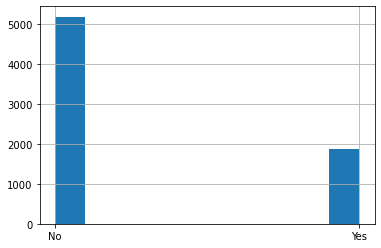

In [48]:
telco_data.churn.hist()

In [12]:
telco_data.churn.value_counts()

No     5179
Yes    1870
Name: churn, dtype: int64

## Step 1:
- find number of churned customers, and the percent of churned customers. Comapre to industry average:

In [41]:
telco_churn = telco_data[telco_data.churn == "Yes"].churn.count()
telco_churn

1870

In [40]:
telco_churn_pct = telco_data[telco_data.churn == "Yes"].shape[0]/len(telco_data) ## this is TELCO's churn rate
telco_churn_pct

0.2652858561498085

## Takeaway:
- TELCO's churn rate is 26.52%
- the Telecom (Phone and Internet service) Industry average churn rate for 2022 is 21%
(source: https://www.statista.com/statistics/816735/customer-churn-rate-by-industry-us/)
- TELCO has a 5.5% higher churn rate than the industry average

## Follow-up Questions:
1. How much does this cost annually in lost revenue? (assume tenure would be the lifetime of median non-Churn accounts life, frame in yearly terms, then lifetime terms). Median tenure for non-churn

2. How much does this cost annually in new customer acquisition?

In [22]:
churn_total_monthly_charges = telco_data[telco_data.churn == 'Yes'].monthly_charges.sum()
churn_total_monthly_charges

139161.35

## Step 2:
- find the average tenure in months of non-churned customers

In [19]:
stay_tenure = telco_data[telco_data.churn == "No"].tenure.median()
stay_tenure

37.6

## Step 2b:
- median tenure of accounts for churn

In [20]:
churn_tenure = telco_data[telco_data.churn == "Yes"].tenure.median()
churn_tenure

9.7

In [21]:
## median monthly revenue for non-Churn accounts
churn_monthly_mdn_charge = telco_data[telco_data.churn == "Yes"].monthly_charges.median()
churn_monthly_mdn_charge

79.625

## Step 3:
- find annual revenue loss per churned customer (12 months - months served on contract by churned customer):

In [25]:
annual_lost_revenue = churn_monthly_mdn_charge * (12 - churn_tenure) 
annual_lost_revenue

183.13750000000005

In [42]:
agg_annual_lost_revenue = annual_lost_revenue * telco_churn ## annual lost revenue per churn * number of churned
agg_annual_lost_revenue

342467.12500000006

## Step 4:
- sum that number to give total churned customers lifetime revenue loss to the company

In [43]:
churn_lifetime_lost_revenue = (stay_tenure - churn_tenure) * churn_monthly_mdn_charge #lifetime loss per customer
churn_lifetime_lost_revenue

2221.5375000000004

In [44]:
agg_churn_lifetime_lost_revenue = churn_lifetime_lost_revenue * telco_churn
agg_churn_lifetime_lost_revenue

4154275.1250000005

## Step 5:
find average acquisition cost per new customer, and multiply by amount of customers required to replace churned customers

- Average Cost of Customer Acquisiton:

    - $315 in 2022 (https://startuptalky.com/cac-by-industry/) 
    
    - replacing 1870 customers, at a cost of $315/ customer: $589,050
    
    - TELCO annual loss of revenue due to churn is: $342,467
    

## Step 6:
Sum both numbers, to give overall lost revenue total. this is the completed problem statement for the company Sales Department

- Annual Total Cost:
    
    - annual churn cost (revenue loss + customer acquisition) = $931,517

## Step 7:
How much does the lost revenue represent in terms of total annual revenue?
- total revenue = avg monthly charges * 12 * count of customers to TELCO = $5,476,820.40

In [54]:
telco_data.monthly_charges.mean() * 12 * telco_data.customer_id.count()

5476820.400000002